In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
crypto_df = pd.read_csv(Path('resources/crypto_data.csv'))
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.rename(columns={'Unnamed: 0':'Ticker'}, inplace=True)
crypto_df


,Ticker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
crypto_df = crypto_df.drop(['IsTrading'], axis=1)
crypto_df

,Ticker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,PoW/PoS,NaN,21000000


In [5]:
crypto_df.dropna(inplace=True)
crypto_df

,Ticker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [6]:
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] >=1]
crypto_df


,Ticker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [7]:
crypto_df = crypto_df.drop(['CoinName'], axis=1)
crypto_df

,Ticker,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000
1247,XBC,Scrypt,PoS,1.283270e+05,1000000


In [8]:
crypto_df.dtypes


Ticker              object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [9]:
crypto_df.drop(crypto_df[crypto_df['TotalCoinsMined'] <= 0].index, inplace=True)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 1248
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           577 non-null    object 
 1   Algorithm        577 non-null    object 
 2   ProofType        577 non-null    object 
 3   TotalCoinsMined  577 non-null    float64
 4   TotalCoinSupply  577 non-null    object 
dtypes: float64(1), object(4)
memory usage: 43.2+ KB


In [10]:
ticker = crypto_df['Ticker']
crypto_data = crypto_df.drop(columns='Ticker', axis=1)
crypto_data.columns

Index(['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply'], dtype='object')

In [11]:
dummies_df = pd.get_dummies(crypto_data, columns=['Algorithm', 'ProofType'])
dummies_df.head()


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
scaled_df = StandardScaler().fit_transform(dummies_df)

In [13]:
scaled_df.shape

(577, 101)

In [14]:
pca = PCA(n_components=.90)
crypto_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data=crypto_pca)
crypto_pca.shape

(577, 77)

In [15]:
tsne = TSNE(learning_rate=40)
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(577, 2)

In [16]:
X = tsne_features[:, 0]
y = tsne_features[:, 1]

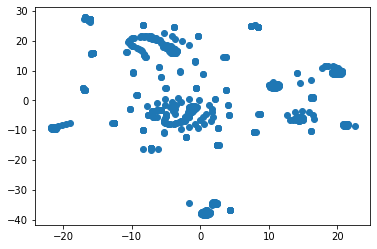

In [17]:
plt.scatter(X, y)
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


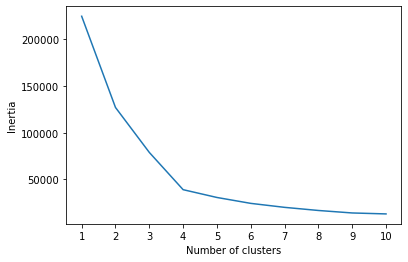

In [18]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]
k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()